##Import required packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
#seed random number generator of numpy for reproducibility
np.random.seed(1000)

##Linearly Separable Data

###Data Generation

1. Generate 100 two-dimensional data points from a 2D Gaussian distribution with mean [-2,-2] and variance [[0.5, 0],[0, 0.5]]. Label data points as class +1. Consider this labeled data set as $D_1$.  ($\textbf{Hint:}$ Use numpy.random.multivariate_normal)

In [65]:
n = 100
#Generate D_1
X1 = np.random.multivariate_normal(mean=[-2,-2], cov=[[0.5,0],[0,0.5]], size=n)
Y1 = (np.ones(n)).reshape(n,1)
D1 = np.concatenate((X1,Y1), axis=1)

In [66]:
D1

array([[-2.56883792, -1.77306713,  1.        ],
       [-2.01801912, -1.54439425,  1.        ],
       [-2.21269537, -1.7245999 ,  1.        ],
       [-2.07596964, -2.33939929,  1.        ],
       [-1.57924636, -2.32856956,  1.        ],
       [-1.52816086, -2.57000981,  1.        ],
       [-2.84574909, -2.28705718,  1.        ],
       [-2.12896025, -1.9270316 ,  1.        ],
       [-2.09787913, -1.50100014,  1.        ],
       [-1.10070494, -2.69773573,  1.        ],
       [-2.23676442, -2.07034418,  1.        ],
       [-1.7120717 , -1.34989484,  1.        ],
       [-1.77929924, -0.91589141,  1.        ],
       [-2.38903167, -2.27092613,  1.        ],
       [-2.58190714, -0.8685702 ,  1.        ],
       [-2.04898928, -1.941162  ,  1.        ],
       [-2.23117065, -2.0323835 ,  1.        ],
       [-2.21528577, -0.6402265 ,  1.        ],
       [-2.05562031, -2.41158262,  1.        ],
       [-3.14408621, -1.386754  ,  1.        ],
       [-2.73570012, -1.5400826 ,  1.   

2. Generate 100 two-dimensional data points from a 2D Gaussian distribution with mean [1,1] and variance [[0.5, 0],[0, 0.5]]. Label data points as class -1. Consider this labeled data set as $D_2$.

In [67]:
#Generate D_2
X2 = np.random.multivariate_normal(mean=[1,1], cov=[[0.5,0],[0,0.5]], size=n)
Y2 = -Y1
D2 = np.concatenate((X2,Y2), axis=1)

In [68]:
D2

array([[ 0.21105747,  0.04910316, -1.        ],
       [ 1.53269447,  2.42076872, -1.        ],
       [ 0.55270601,  0.82464958, -1.        ],
       [ 1.29193776,  0.34646891, -1.        ],
       [ 1.9711602 , -0.94431573, -1.        ],
       [ 1.01635435,  0.75840341, -1.        ],
       [ 0.19583904,  1.80212557, -1.        ],
       [ 0.110433  , -0.24752186, -1.        ],
       [ 1.13810903, -0.99597627, -1.        ],
       [ 0.41306499,  1.61797093, -1.        ],
       [ 2.00938009,  0.5185579 , -1.        ],
       [ 2.39009895,  1.46509271, -1.        ],
       [ 2.15583911,  0.74461802, -1.        ],
       [ 0.83596102,  2.05312709, -1.        ],
       [ 0.76996816,  0.26806572, -1.        ],
       [ 0.21826838,  1.46751349, -1.        ],
       [ 0.61786964, -0.21485678, -1.        ],
       [ 0.76210825,  1.52658707, -1.        ],
       [ 0.70199638,  1.37590101, -1.        ],
       [ 1.52097377,  1.24704166, -1.        ],
       [ 1.19739979,  0.61496222, -1.   

3. Construct $D=D_1 \cup D_2$. Shuffle the data in $D$. (Hint: Use random.shuffle().)

In [69]:
#Construct D and shuffle.
D = np.concatenate((D1,D2), axis=0)
np.random.shuffle(D)

In [70]:
D

array([[-1.52834155, -1.38517398,  1.        ],
       [ 1.70477944,  1.1331235 , -1.        ],
       [-0.09106211, -1.43288303,  1.        ],
       [ 0.27518114,  2.14205835, -1.        ],
       [-0.87539105, -2.18263736,  1.        ],
       [-2.56169197, -2.12358676,  1.        ],
       [ 0.99648783,  0.46669477, -1.        ],
       [-1.68390274, -0.62933026,  1.        ],
       [-2.04898928, -1.941162  ,  1.        ],
       [-2.91892928, -2.61166327,  1.        ],
       [-2.31470043, -3.08285066,  1.        ],
       [-1.79400552, -2.05798714,  1.        ],
       [ 1.71119466, -0.48881629, -1.        ],
       [-2.59066626, -3.1985448 ,  1.        ],
       [-2.25416192, -2.36380519,  1.        ],
       [ 0.7078917 ,  0.33789441, -1.        ],
       [ 2.39009895,  1.46509271, -1.        ],
       [ 1.32711164,  1.1665055 , -1.        ],
       [-1.19855299, -1.25857682,  1.        ],
       [-2.50153318, -2.03787839,  1.        ],
       [-2.38903167, -2.27092613,  1.   

###Data Visualization

In [11]:
def plot_data(data):
  #write code to plot the data points. Use different colors for different classes.
  x1 = data[:,0]
  x2 = data[:,1]
  y = data[:,2]
  for label in np.unique(y):
    i = np.where(y == label)
    plt.scatter(x1[i], x2[i], label=label)
  plt.legend()
  plt.xlabel('x1')
  plt.ylabel('x2')

Write code to visualize the data $D$ you have generated. Use different colors for different classes. (Use matplotlib.pyplot.scatter to plot the points.)

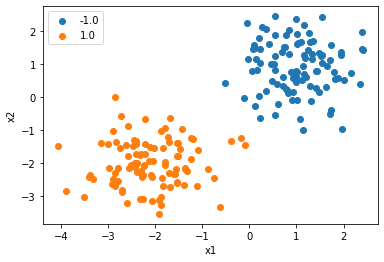

In [71]:
plot_data(D)

The dataset is linearly separable as it is visible from above plot that a line exists which separates the orange and blue points

###Prediction function

Write code to implement the prediction rule used in Perceptron and T-Perceptron. (Use the numpy function which helps in computing the dot product between two vectors.)

In [12]:
def perceptron_prediction(w, x):
    #write code to compute the prediction for the example x using weight w
    inner_prod = np.dot(w,x)
    prediction = np.sign(inner_prod)
    return prediction

In [9]:
def sigma(a):
    return (np.exp(2*a)-1)/(np.exp(2*a)+1)

In [10]:
def t_perceptron_prediction(w, x):
    #write code to compute the prediction for the example x using weight w
    inner_prod = np.dot(w,x)
    transformed = sigma(inner_prod)
    prediction = np.sign(transformed)
    return prediction

###Function to update weights 

Write code to implement the update rule for updating weights in perceptron and t-perceptron learning algorithm. If there is a mistake in prediction made by perceptron, return is_mistake as True, otherwise return is_mistake as False. 

In [13]:
def perceptron_update_weights(w, x, y, y_pred):
    #check for mistake and set is_mistake flag accordingly
    #and write code to update the weights in perceptron 
    is_mistake = False
    if y != y_pred:
      is_mistake = True
      w += y*x
    return w, is_mistake

In [110]:
def sigma_derivative(a):
    return 1-(sigma(a)**2)

In [111]:
def t_perceptron_update_weights(w, x, y, y_pred, n):
    #check for mistake and set is_mistake flag accordingly
    #and write code to update the weights in perceptron 
    is_mistake = False
    if y != y_pred:
      is_mistake = True
      inner_prod = np.dot(w,x)
      w += n*(y-sigma(inner_prod))*sigma_derivative(inner_prod)*x
    return w, is_mistake

###Functions to generate plots

Write code to plot the separating line along with the data.

In [16]:
def plot_data_with_separator(data, w):
  #write required code. (You can reuse the code written for plotting the data points.)
  plot_data(data)
  p1 = np.linspace(-5,3,100)
  p2 = -(w[2]+(w[0]*p1))/w[1]
  plt.plot(p1,p2,'-g')

Write code to plot the number of mistakes for each epoch.

In [17]:
def mistake_vs_epochs(mistakes):
  epochs = range(1,len(mistakes)+1)
  plt.plot(epochs,mistakes)
  plt.xlabel('No of epochs')
  plt.ylabel('No of mistakes')

###Perceptron training procedure

Complete the training procedure to train perceptron by adding appropriate code where required.

In [18]:
def train_perceptron(w,data):
    num_mistakes = 99 #some dummy value to get the while loop going 
    mistake_history = [] 
    while num_mistakes > 0:   # till no mistakes occur for an epoch (convergence)
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,(1,)))
            y_hat = perceptron_prediction(w, x)
            #retrieve the label y for x from data set D 
            y = data[i,2]
            w, is_mistake = perceptron_update_weights(w, x, y, y_hat)
            if is_mistake:
              num_mistakes += 1
        mistake_history.append(num_mistakes)
    return w, mistake_history

In [73]:
#randomly initialize weights with each coordinate sampled from a Gaussian distribution with zero mean and unit variance
w_init = (np.random.normal(0,1),np.random.normal(0,1),np.random.normal(0,1))
w_final, mistakes = train_perceptron(w_init,D)    

###Generate the 2 plots

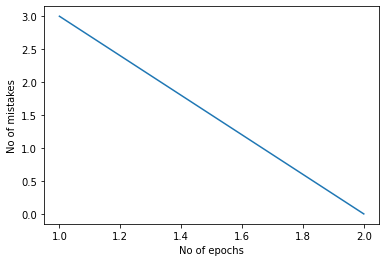

In [76]:
mistake_vs_epochs(mistakes)

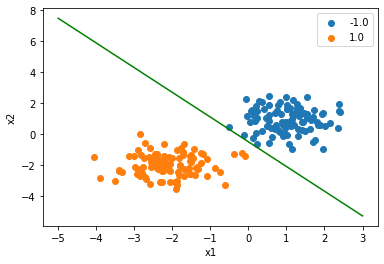

In [74]:
plot_data_with_separator(D, w_final)

###T-Perceptron training procedure

In [112]:
def train_t_perceptron(w,data,n):
    num_mistakes = 99 #some dummy value to get the while loop going 
    mistake_history = [] 
    while num_mistakes > 0:   # till no mistakes occur for an epoch (convergence)
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,(1,)))
            y_hat = t_perceptron_prediction(w, x)
            #retrieve the label y for x from data set D 
            y = data[i,2]
            w, is_mistake = t_perceptron_update_weights(w, x, y, y_hat, n)
            if is_mistake:
              num_mistakes += 1
        mistake_history.append(num_mistakes)
    return w, mistake_history

In [113]:
w1, m1 = train_t_perceptron(w_init,D,0.01)
w2, m2 = train_t_perceptron(w_init,D,0.001)
w3, m3 = train_t_perceptron(w_init,D,0.0001)

In [114]:
len(m1), len(m2), len(m3)

(19, 178, 1759)

### Comparing mistakes vs epochs for Perceptron & TP with varying n

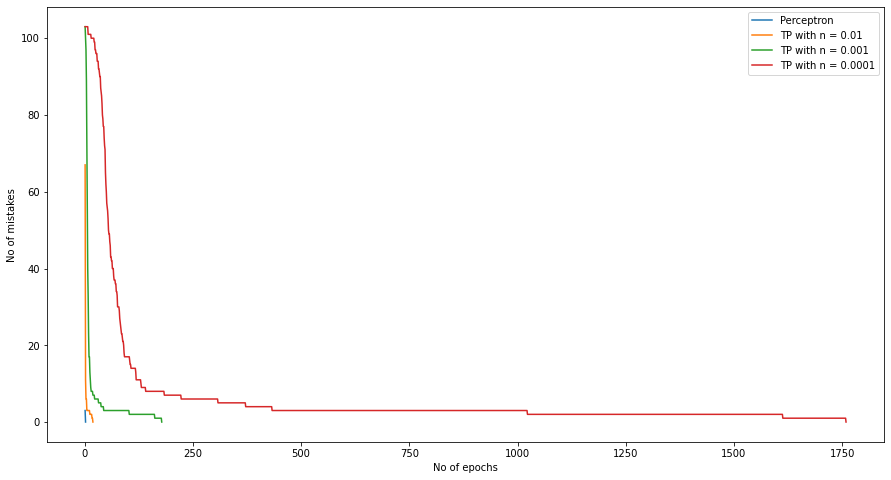

In [115]:
plt.figure(figsize=(15,8))
mistake_vs_epochs(mistakes)
mistake_vs_epochs(m1)
mistake_vs_epochs(m2)
mistake_vs_epochs(m3)
plt.legend(['Perceptron','TP with n = 0.01','TP with n = 0.001', 'TP with n = 0.0001'])

Lower the n value, smaller is the weight update and hence more mistakes and weight updates occur (thus higher epochs) before convergence. <br>
Perceptron has undergone very few mistakes (3) in just 1 epoch before converging while T-Perceptron for the highest n value itself had 60+ mistakes in 1st epoch while taking 19 epochs to converge. For lower n values, the no of mistakes (upto 100+ in 1st epoch itself) and epochs (upto 1750+) are much higher.

###Comparing the separations obtained

In [118]:
# generating grid points
x1 = np.linspace(-5,3,100)
x2 = np.linspace(-5,8,100)
from itertools import product
points = np.array(list(product(x1,x2)))
points.shape

(10000, 2)

####Plot for n = 0.01

In [119]:
y = np.array([t_perceptron_prediction(w1,np.concatenate((x,(1,)))) for x in points]).reshape(points.shape[0],1)
grid_data = np.concatenate((points,y), axis=1)
grid_data.shape

(10000, 3)

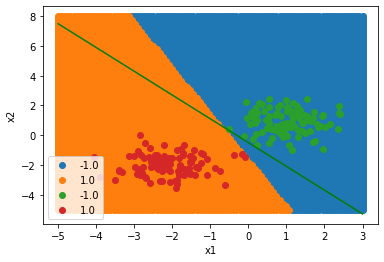

In [120]:
plot_data(grid_data)
plot_data_with_separator(D, w_final)

####Plot for n = 0.001

In [121]:
y2 = np.array([t_perceptron_prediction(w2,np.concatenate((x,(1,)))) for x in points]).reshape(points.shape[0],1)
grid_data_2 = np.concatenate((points,y2), axis=1)
grid_data_2.shape

(10000, 3)

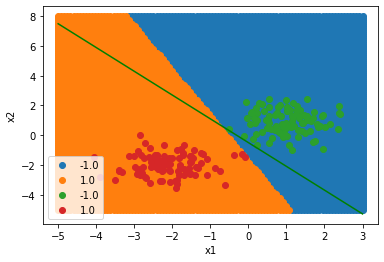

In [122]:
plot_data(grid_data_2)
plot_data_with_separator(D, w_final)

####Plot for n = 0.0001

In [123]:
y3 = np.array([t_perceptron_prediction(w3,np.concatenate((x,(1,)))) for x in points]).reshape(points.shape[0],1)
grid_data_3 = np.concatenate((points,y3), axis=1)
grid_data_3.shape

(10000, 3)

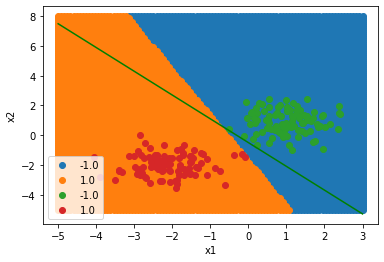

In [124]:
plot_data(grid_data_3)
plot_data_with_separator(D, w_final)

Note: Red (+1 labelled) & Green (-1 labelled) Points are data points. Dark Green line is perceptron separating line. While orange and blue regions consists of points with predicted classes 1 & -1 respectively with change in color visible as an irregular separating line (surface).

The T-Perceptron final separation surface looks same for different n values but is different from the separating line obtained from perceptron. The perceptron has green (-1) data points close by but red considerably far while TP separating surface has both green & red points close by.

## Linearly Non-Separable Data

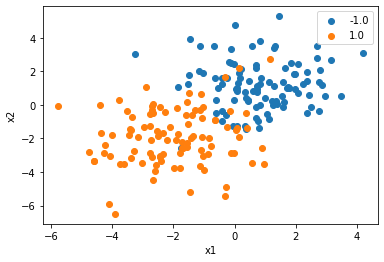

In [88]:
n = 100
X1_ = np.random.multivariate_normal(mean=[-2,-2], cov=[[2,0],[0,2]], size=n)
Y1_ = (np.ones(n)).reshape(n,1)
D1_ = np.concatenate((X1_,Y1_), axis=1)
X2_ = np.random.multivariate_normal(mean=[1,1], cov=[[2,0],[0,2]], size=n)
Y2_ = -Y1_
D2_ = np.concatenate((X2_,Y2_), axis=1)
D_ = np.concatenate((D1_,D2_), axis=0)
np.random.shuffle(D_)
plot_data(D_)

Clearly the data is linearly non-separable as no line can separate the orange and blue points

In [89]:
def train_perceptron(w,data):
    epochs = 0
    max_epochs = 100
    num_mistakes = 99 #some dummy value to get the while loop going 
    mistake_history = [] 
    while num_mistakes > 0 and epochs < max_epochs:   # till no mistakes occur in an epoch or max_epochs are reached
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,(1,)))
            y_hat = perceptron_prediction(w, x)
            #retrieve the label y for x from data set D 
            y = data[i,2]
            w, is_mistake = perceptron_update_weights(w, x, y, y_hat)
            if is_mistake:
              num_mistakes += 1
        mistake_history.append(num_mistakes)
        epochs += 1
    return w, mistake_history

In [90]:
#randomly initialize weights with each coordinate sampled from a Gaussian distribution with zero mean and unit variance
w_init_2 = (np.random.normal(0,1),np.random.normal(0,1),np.random.normal(0,1))
w_final_2, mistakes_2 = train_perceptron(w_init_2,D_)    

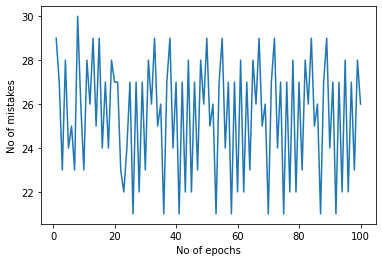

In [91]:
mistake_vs_epochs(mistakes_2)

Mistakes are occuring even after 100 epochs so perceptron hasn't converged (training hasn't ended)

In [125]:
def TP_Algorithm_1(w,data,n):
    epochs = 0
    max_epochs = 100 
    mistake_history = [] 
    while epochs < max_epochs:   # till max_epochs are reached
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,(1,)))
            y_hat = t_perceptron_prediction(w, x)
            #retrieve the label y for x from data set D 
            y = data[i,2]
            w, is_mistake = t_perceptron_update_weights(w, x, y, y_hat, n)
            if is_mistake:
              num_mistakes += 1
        mistake_history.append(num_mistakes)
        epochs += 1
        if num_mistakes == 0: #indicates convergence
          break
    return w, mistake_history

In [126]:
w1_, m1_ = TP_Algorithm_1(w_init_2,D_,0.01)
w2_, m2_ = TP_Algorithm_1(w_init_2,D_,0.001)
w3_, m3_ = TP_Algorithm_1(w_init_2,D_,0.0001)

In [127]:
len(m1_), len(m2_), len(m3_)

(100, 100, 100)

For none of the 3 n values did algorithm 1 converge before 100 epochs

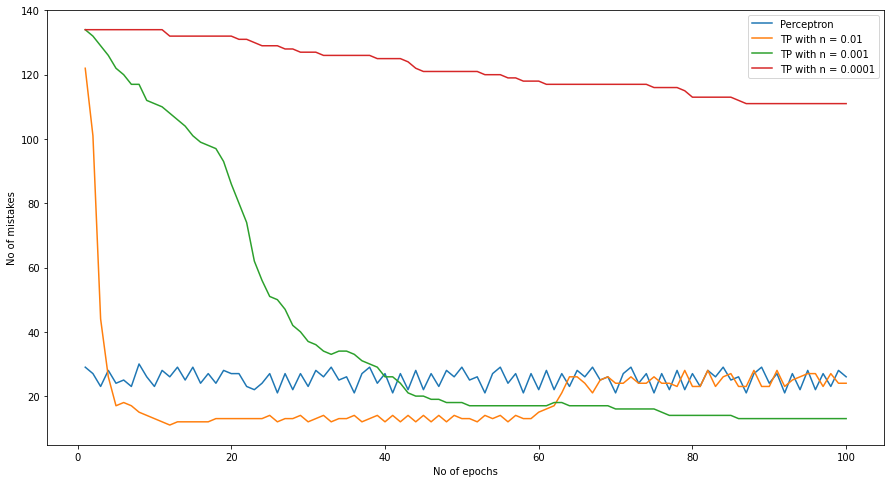

In [128]:
plt.figure(figsize=(15,8))
mistake_vs_epochs(mistakes_2)
mistake_vs_epochs(m1_)
mistake_vs_epochs(m2_)
mistake_vs_epochs(m3_)
plt.legend(['Perceptron','TP with n = 0.01','TP with n = 0.001', 'TP with n = 0.0001'])

For n = 0.0001 we have the smallest weight update which explains large no of mistakes even after 100 epochs.<br>
For n = 0.01 no of mistakes quickly reduce but again rise up to be finally around same no of mistakes as perceptron.<br>
At the end of 100 epochs, n = 0.001 gives the lowest no of mistakes and as per graph they may still reduce.

In [129]:
# generating grid points
x1_ = np.linspace(-6,5,100)
x2_ = np.linspace(-7,6,100)
from itertools import product
points_ = np.array(list(product(x1_,x2_)))
points_.shape

(10000, 2)

###For n = 0.01

In [130]:
y1_ = np.array([t_perceptron_prediction(w1_,np.concatenate((x,(1,)))) for x in points_]).reshape(points_.shape[0],1)
grid_data_1_ = np.concatenate((points_,y1_), axis=1)
grid_data_1_.shape

(10000, 3)

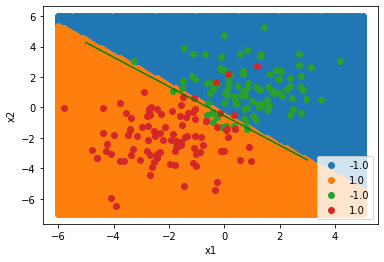

In [131]:
plot_data(grid_data_1_)
plot_data_with_separator(D_, w_final_2)

###For n = 0.001

In [133]:
y2_ = np.array([t_perceptron_prediction(w2_,np.concatenate((x,(1,)))) for x in points_]).reshape(points_.shape[0],1)
grid_data_2_ = np.concatenate((points_,y2_), axis=1)
grid_data_2_.shape

(10000, 3)

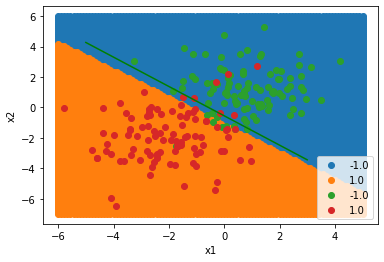

In [134]:
plot_data(grid_data_2_)
plot_data_with_separator(D_, w_final_2)

###For n = 0.0001

In [135]:
y3_ = np.array([t_perceptron_prediction(w3_,np.concatenate((x,(1,)))) for x in points_]).reshape(points_.shape[0],1)
grid_data_3_ = np.concatenate((points_,y3_), axis=1)
grid_data_3_.shape

(10000, 3)

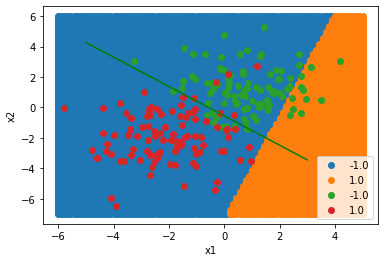

In [138]:
plot_data(grid_data_3_)
plot_data_with_separator(D_, w_final_2)

It seems TP with n = 0.0001 has negligibly learnt with its separating surface way off the closest possible and different than for the other 2 n values or perceptron which seem to be closer to each other. From mistakes vs epochs plot, TP with n = 0.001 shows the best behaviour of continued learning (mistakes decreasing with epochs albiet slowly) so it might be useful.